## 线性回归--Boston数据集
- 波士顿房价数据集是统计的20世纪70年代中期波士顿郊区房价的中位数，统计了当时郊区部分的犯罪率、房产税等共计13个特征，统计出房价，试图根据这些特征确定房价。本例子是属于回归模型的案例。在数据集中包含506组数据，其中404是训练样本，剩下的102组数据作为验证样本。
- 数据集特征介绍
   - CRIM：城镇人均犯罪率；<br />
   - ZN：住宅用地超过 25000 sq.ft. 的比例 <br />
   - INDUS：城镇非零售商用土地的比例 <br />
   - CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）<br />
   - NOX：一氧化氮浓度 <br />
   - RM：住宅平均房间数 <br />
   - AGE：1940 年之前建成的自用房屋比例 <br />
   - DIS：到波士顿五个中心区域的加权距离 <br />
   - RAD：辐射性公路的接近指数 <br />
   - TAX：每 10000 美元的全值财产税率 <br />
   - PTRATIO：城镇师生比例 <br />
   - B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例 <br />
   - LSTAT：人口中地位低下者的比例
- 模型介绍
   - 加载数据集，这里利用tensorflow高阶API keras里的自带的数据集boston
   - 搭建网络层，这里采用全连接层
   - 训练过程

In [1]:
import tensorflow as tf

In [2]:
def read_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='C:/Users/xiaofang/company_tf/data/boston_housing.npz',
                                                                                      test_split=0.2,
                                                                                      seed=113)
    print("train data shape", x_train.shape)
    print("y train data shape", y_train.shape)
    print("test data shape", x_test.shape)
    print("y test data shape", y_test.shape)
    return x_train, y_train, x_test, y_test

In [3]:
def LRmodel():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(10, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1, activation="relu"))
    model.compile(loss="mse", optimizer="adam", metrics=['mae'])
    return model

In [4]:
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline

def main():
    ## 加载数据集
    x_train, y_train, x_test, y_test = read_data()
    ## model
    model = LRmodel()
    my_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, 
                        callbacks=my_callbacks)
    print("training finish")
    ## predict
    pred = model.predict(x_test)
    # int("model predict result: ", pred)
    ## 显示model的loss情况
    fig1 = plt.figure()
    plt.plot(history.history["loss"], "r", linewidth=3.0)
    plt.plot(history.history["val_loss"], "b", linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves :CNN',fontsize=16)
    fig1.savefig('training_loss.png')
    plt.show()

train data shape (404, 13)
y train data shape (404,)
test data shape (102, 13)
y test data shape (102,)
Train on 404 samples, validate on 102 samples
Epoch 1/20
404/404 [==============================] - 1s 2ms/sample - loss: 513.9397 - mae: 19.8529 - val_loss: 304.4604 - val_mae: 15.2607
Epoch 2/20
404/404 [==============================] - 0s 91us/sample - loss: 368.4501 - mae: 15.7625 - val_loss: 89.6836 - val_mae: 6.6485
Epoch 3/20
404/404 [==============================] - 0s 96us/sample - loss: 288.8119 - mae: 13.3370 - val_loss: 167.6676 - val_mae: 10.3972
Epoch 4/20
404/404 [==============================] - 0s 96us/sample - loss: 231.5159 - mae: 12.0700 - val_loss: 156.0311 - val_mae: 10.0070
Epoch 5/20
404/404 [==============================] - 0s 106us/sample - loss: 209.8608 - mae: 11.1490 - val_loss: 113.5387 - val_mae: 8.0456
training finish


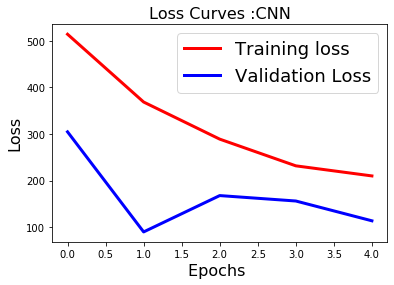

In [5]:
if __name__ == "__main__":
    main()